In [1]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

In [ ]:
!unzip /content/customer-segmentation-tutorial-in-python.zip

## **Case Study**
***Context*** <br>
This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

***Content***<br>
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

***Problem Statement***<br>
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [9]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [10]:
df.shape

(200, 5)

In [11]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [12]:
#drop the customerID because we don't need it
df.drop( 'CustomerID', axis=1, inplace=True)

In [13]:
df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6


In [14]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


*One hot encoder = dummy variables for the Gender*

In [15]:
gender = df['Gender']
newdf = pd.get_dummies(df, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)



In [16]:
newdf.head(3)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0


*The values for ‘Gender_Male’ can be inferred from ‘Gender_Female,’ (that is, if ‘Gender_Female’ is 0, then ‘Gender_Male’ will be 1 and vice versa).<br>*
- keep one column is sufficient

In [17]:
newdf = newdf.drop(['Gender_Male'],axis=1)

In [18]:
newdf.head(3)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1


## ***Find the right K using the Elbow plot***

In [19]:
newdf.isnull().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Gender_Female             0
dtype: int64

In [20]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10),random_state=1)

In [21]:
data_sample = newdf.sample(n=100)

In [22]:
data_sample.head(3)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female
190,34,103,23,1
24,54,28,14,1
186,54,101,24,1


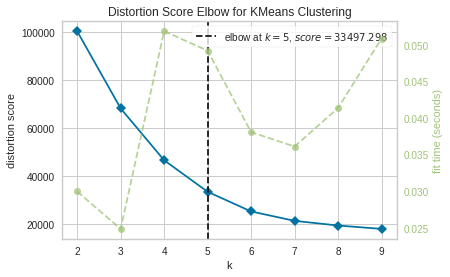

In [23]:
visualizer.fit(data_sample)        # Fit the data to the visualizer
visualizer.show()                  # Finalize and render the figure\

- Based on the elbow plot above, we can see that the optimal number of clusters is 5.

***K-MEANS*** <br>
*K-means clustering is a type of Unsupervised Learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K.*

In [24]:
kmeans = KMeans(n_clusters=5) #from the plot 

In [25]:
k_fit = kmeans.fit(newdf)

In [26]:
predict = k_fit.labels_

In [27]:
newdf['clusters'] = predict
newdf.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,clusters
0,19,15,39,0,3
1,21,15,81,0,4
2,20,16,6,1,3
3,23,16,77,1,4
4,31,17,40,1,3


***Quick discover for the clusters***

In [28]:
newdf["clusters"].value_counts()

1    79
2    39
0    36
4    23
3    23
Name: clusters, dtype: int64

In [29]:
import plotly.express as px

In [31]:
fig = px.bar(newdf, y = newdf["clusters"].value_counts().index, x = newdf["clusters"].value_counts(),orientation='h',
             labels={"x": "Total of individuals",
                     "y": "Clusters"})
fig.show()

In [32]:
newdf.groupby('clusters').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female
clusters,,,,
0,40.666667,87.750000,17.583333,0.472222
1,43.088608,55.291139,49.569620,0.582278
2,32.692308,86.538462,82.128205,0.538462
3,45.217391,26.304348,20.913043,0.608696
4,25.521739,26.304348,78.565217,0.608696
